In [1]:
import pandas as pd
import matplotlib.pyplot as plt


dfs = {}

In [2]:
# list dfs that have more than n rows
!cd ../dfs/ && find . -type f | sort | xargs wc -l | awk '$1 > 1'

       7 ./2023-08-11_14-56-45.csv
       7 ./2023-08-11_15-59-00.csv
      23 ./2023-08-11_16-11-25.csv
       7 ./2023-08-11_17-03-31.csv
      17 ./2023-08-11_17-50-24.csv
      17 ./2023-08-11_18-08-52.csv
      17 ./2023-08-11_18-27-31.csv
      17 ./2023-08-11_18-46-04.csv
      17 ./2023-08-11_19-05-19.csv
      17 ./2023-08-11_19-25-15.csv
      17 ./2023-08-11_19-44-36.csv
      11 ./2023-08-11_20-04-24.csv
      17 ./2023-08-12_00-45-56.csv
      17 ./2023-08-12_01-14-04.csv
      17 ./2023-08-12_01-41-54.csv
      17 ./2023-08-12_08-58-20.csv
      11 ./2023-08-12_09-29-09.csv
      17 ./2023-08-12_09-56-48.csv
      17 ./2023-08-12_10-27-23.csv
      17 ./2023-08-12_11-00-42.csv
      17 ./2023-08-12_11-40-56.csv
      17 ./2023-08-12_12-58-09.csv
      17 ./2023-08-12_14-00-23.csv
       7 ./2023-08-12_15-22-06.csv
      17 ./2023-08-12_16-45-07.csv
      90 ./2023-08-12_18-46-07.csv
       5 ./2023-08-12_22-55-49.csv
      75 ./2023-08-13_10-51-25.csv
      13 ./2023-08-1

2023-09-24 02:15:28,284 - DEBUG - pffrocd config: {
    "client": {
        "ip_address": "192.168.5.115",
        "username": "kamil",
        "private_ssh_key_path": "/home/dietpi/.ssh/id_rsa",
        "executable_path": "/home/kamil/pffrocd/ABY/build/bin",
        "executable_name": "cos_dist_float_scen_simd",
        "pffrocd_path": "/home/kamil/pffrocd"
    },
    "server": {
        "ip_address": "192.168.5.114",
        "username": "kamil",
        "private_ssh_key_path": "/home/dietpi/.ssh/id_rsa",
        "executable_path": "/home/kamil/pffrocd/ABY/build/bin",
        "executable_name": "cos_dist_float_scen_simd",
        "pffrocd_path": "/home/kamil/pffrocd"
    },
    "misc": {
        "nr_of_people": "1500",
        "security_level": "80",
        "mt_algorithm": "0",
        "niceness": "-20",
        "starting_person": "200",
        "bit_length": "32",
        "gather_energy_data": "0"
    }
}
2023-09-24 02:15:44,570 - INFO - Bandwidth: 61.88 Mbits/sec

SFE TIME STATISTI

<Axes: >

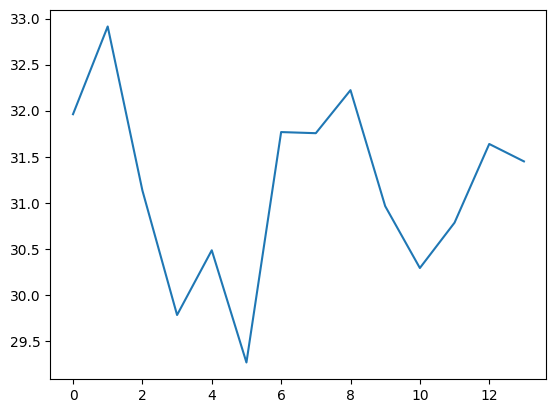

In [3]:
# inspect configuration of a given dfs
NAME = '2023-09-24_02-15-28'

with open(f"../log/debug_{NAME}.log") as input_file:
    head = [next(input_file) for _ in range(28)]
print(''.join(head))

df_inspecting = pd.read_csv(f"../dfs/{NAME}.csv")
print("SFE TIME STATISTICS")
print((df_inspecting['server.timings.total'] / 1000).describe())
(df_inspecting['server.timings.total'] / 1000).plot()

In [4]:
# accumulate all results
dfs_80 = ['2023-09-22_18-28-23', '2023-09-22_18-44-09', '2023-09-22_22-45-02', '2023-09-23_07-30-31', '2023-09-23_13-02-39' ]
dfs_112 = ['2023-09-20_22-45-35', '2023-09-21_00-21-39', '2023-09-21_04-28-09', '2023-09-21_12-07-51', 
          '2023-09-21_14-57-18']
dfs_128 = ['2023-09-21_16-10-04', '2023-09-21_18-56-11', '2023-09-21_22-20-00', '2023-09-22_10-06-03',
           '2023-09-22_11-50-14']

dfs['80'] = pd.concat((pd.read_csv(f"../dfs/{df_name}.csv") for df_name in dfs_80), ignore_index=True)
dfs['112'] = pd.concat((pd.read_csv(f"../dfs/{df_name}.csv") for df_name in dfs_112), ignore_index=True)
dfs['128'] = pd.concat((pd.read_csv(f"../dfs/{df_name}.csv") for df_name in dfs_128), ignore_index=True)

In [5]:
for df in dfs.values():
    print(df['server.timings.total'] > 40000)

0      False
1      False
2      False
3      False
4      False
       ...  
136    False
137    False
138    False
139    False
140    False
Name: server.timings.total, Length: 141, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
213    False
214    False
215    False
216    False
217    False
Name: server.timings.total, Length: 218, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Name: server.timings.total, Length: 158, dtype: bool


In [8]:
for df in dfs.values():
    df.drop(df[df['energy_server'] > 25].index, inplace=True)

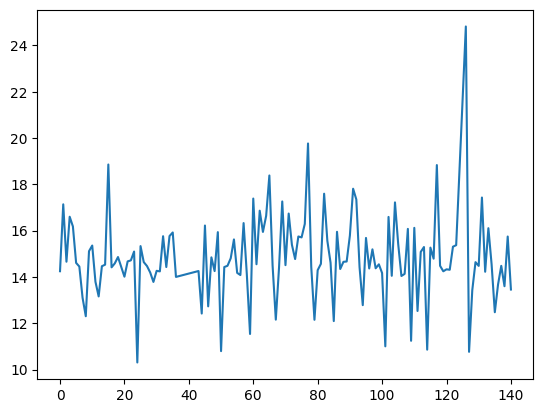

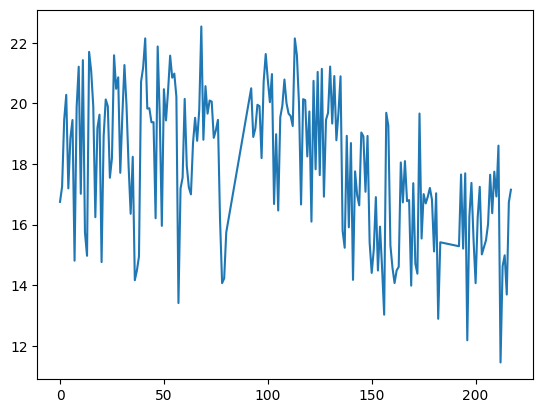

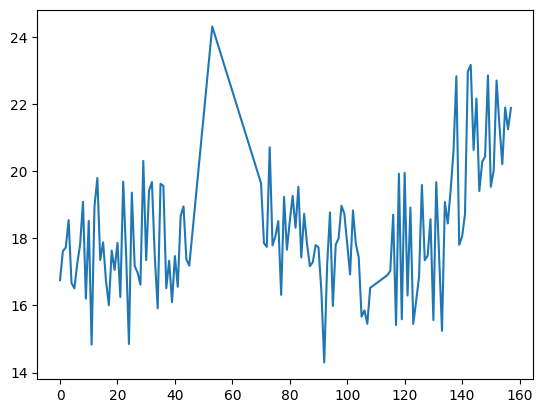

In [9]:
for df in dfs.values():
    df['energy_server'].plot()
    plt.show()

Text(0.5, 0, 'Security level')

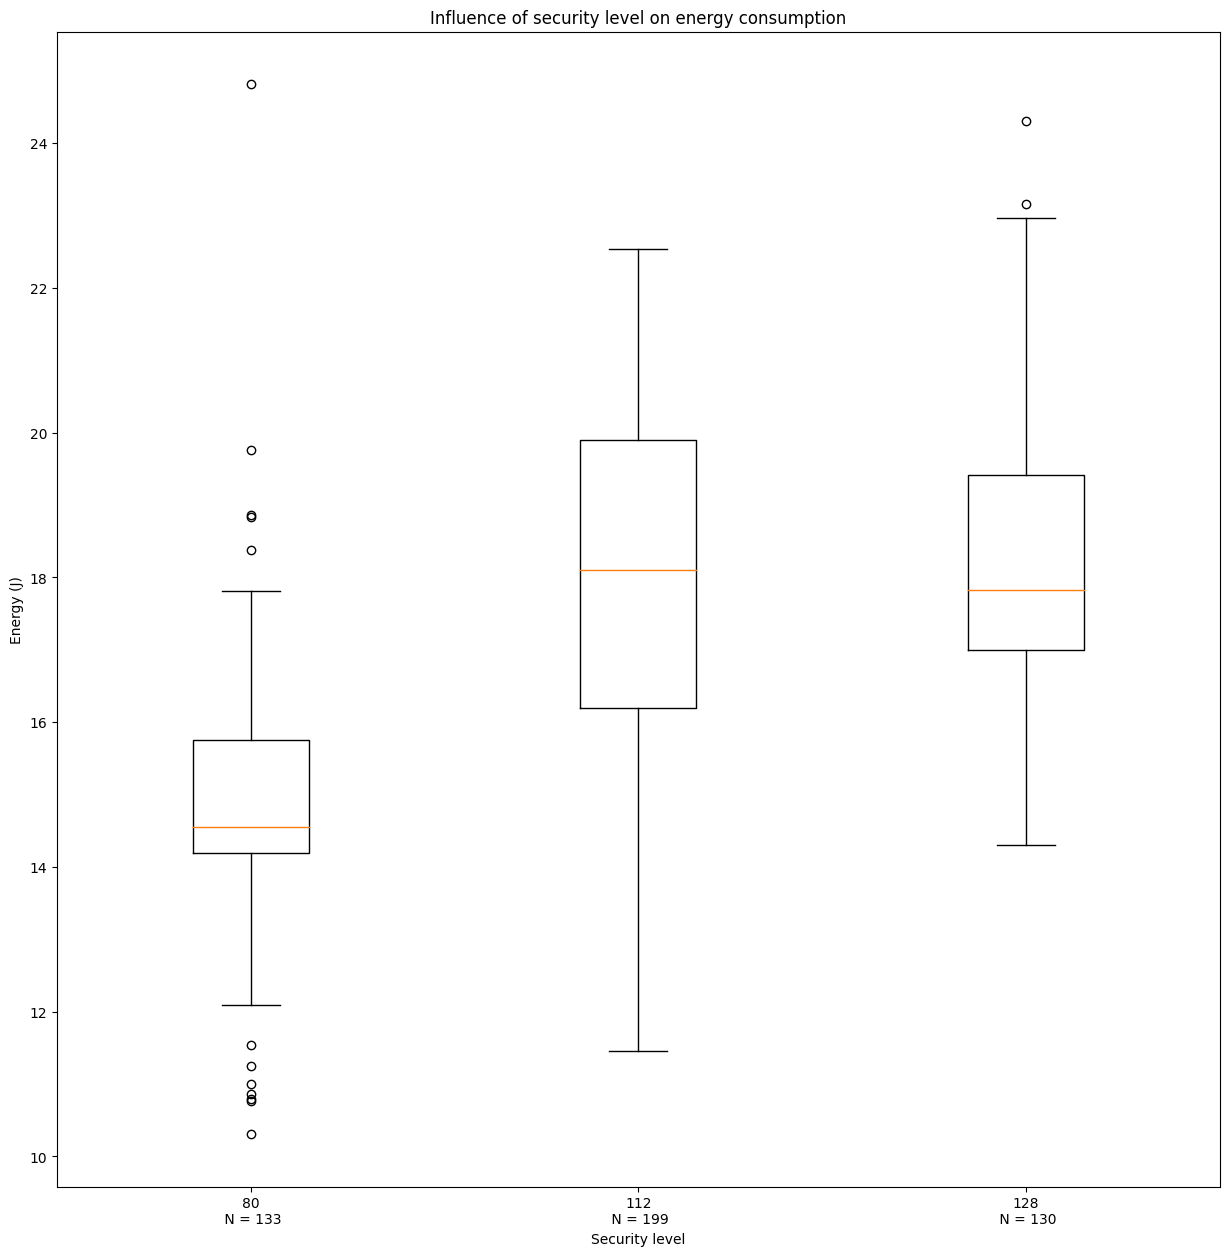

In [11]:
# prepare labels
labels = ['80',
          '112',
          '128'
          ]
for i, k in enumerate(dfs):
    labels[i] += f'\n N = {len(dfs[k]["energy_server"])}'

# plotting energy

plt.rcParams['figure.figsize'] = [15, 15]  # default hor./vert. size of plots, in inches
plt.xticks(rotation=0)
ax = plt.boxplot([df['energy_server'] for df in dfs.values()], labels=labels)
plt.title("Influence of security level on energy consumption")
plt.ylabel("Energy (J)")
plt.xlabel("Security level")

Text(0.5, 0, 'Security level')

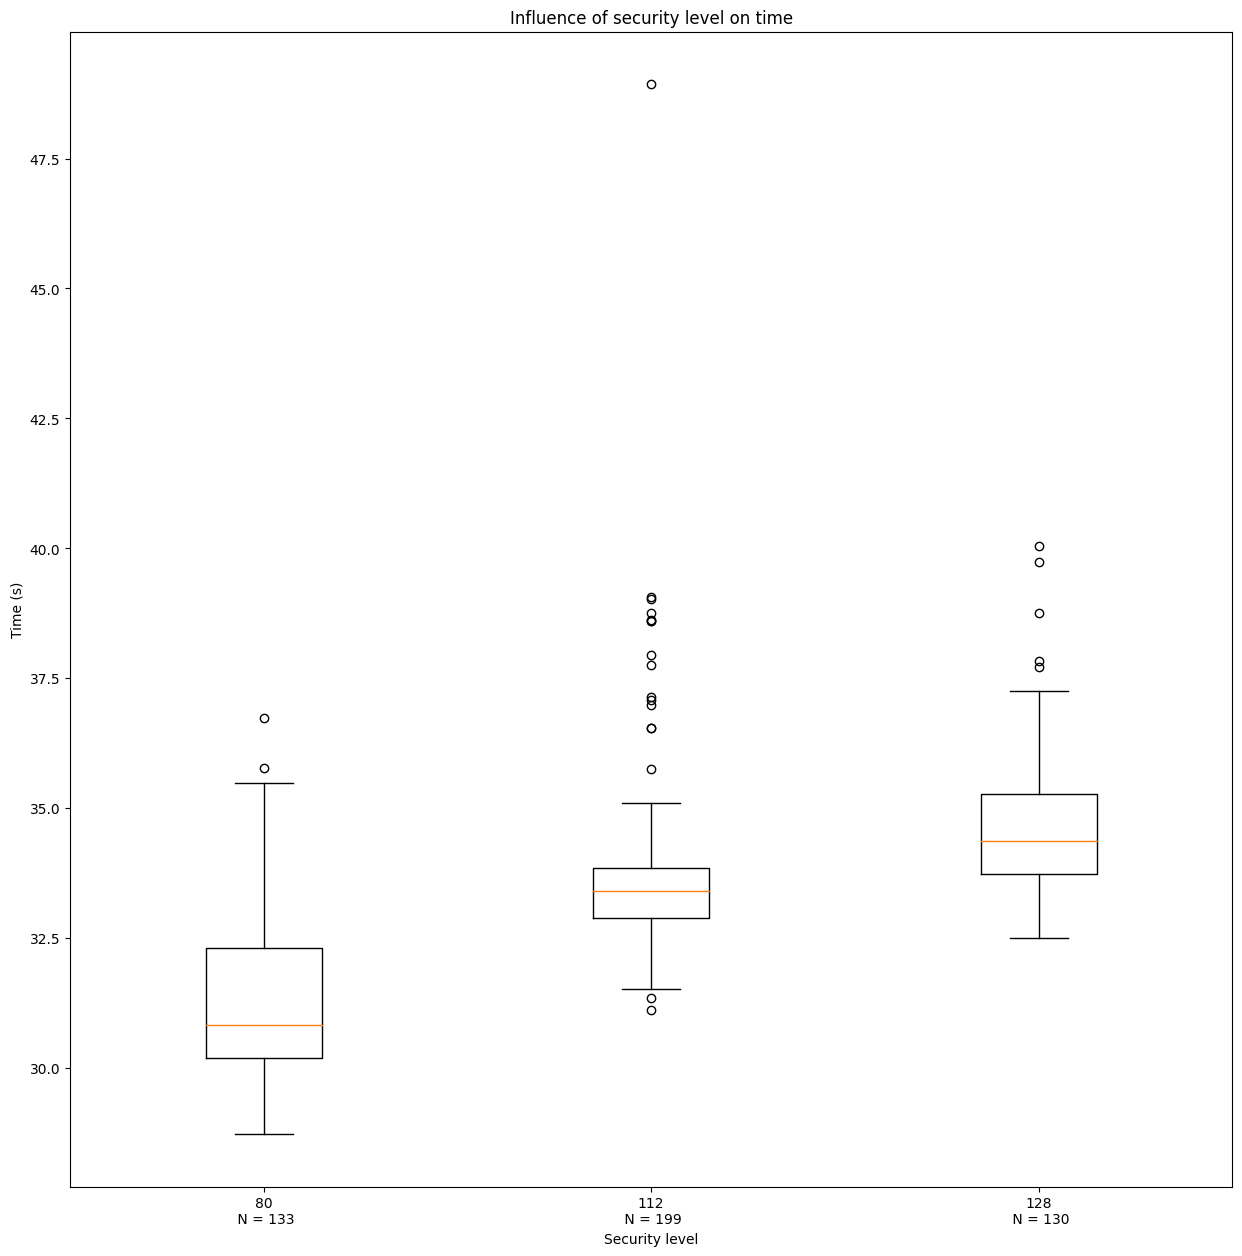

In [13]:
# plotting time

plt.rcParams['figure.figsize'] = [15, 15]  # default hor./vert. size of plots, in inches
plt.xticks(rotation=0)
ax = plt.boxplot([df['server.timings.total'] / 1000 for df in dfs.values()], labels=labels)
plt.title("Influence of security level on time")
plt.ylabel("Time (s)")
plt.xlabel("Security level")